### 概述：

#### 该notebook学习awk相关语法。任务是通过使用awk，完成简单的字符串提取、处理，以及简单的计算并格式化输出。若涉及到较复杂的逻辑运算，可能不如编写Python脚本来的清晰

### 语法：awk '{pattern + action}' {filename}

### 一、基础

* 关键点整理：

①选取最后一个field：{print $NF}

* 实例文本概览  

注意观察文本的分隔符等一些可供使用的“pattern”

In [17]:
## 实例一：
!cat /etc/passwd | head -n 5

root:x:0:0:root:/root:/usr/bin/zsh
daemon:x:1:1:daemon:/usr/sbin:/usr/sbin/nologin
bin:x:2:2:bin:/bin:/usr/sbin/nologin
sys:x:3:3:sys:/dev:/usr/sbin/nologin
sync:x:4:65534:sync:/bin:/bin/sync


In [4]:
## 实例二：
!cat cifar_train_resnet_11_18.log | tail -n 10

[+]Epoch 323, learning rate: 1.9158050414237662e-38, train accuracy: 0.8211777777777778, train loss: 0.8870835304260254, valid accuracy: 0.7618, speed: 20.28913164138794
Epoch 324, Iter 0, train acc 0.765625, train loss 0.6175122261047363
Epoch 324, Iter 100, train acc 0.8285891089108911, train loss 0.43959489464759827
Epoch 324, Iter 200, train acc 0.8249378109452736, train loss 0.4976428747177124
Epoch 324, Iter 300, train acc 0.8249584717607974, train loss 0.473130464553833
Epoch 324, Iter 400, train acc 0.8233322942643392, train loss 0.6402977108955383
Epoch 324, Iter 500, train acc 0.8235716067864272, train loss 0.7435027956962585
Epoch 324, Iter 600, train acc 0.8241472545757071, train loss 0.4847423732280731
Epoch 324, Iter 700, train acc 0.8236670827389444, train loss 0.4887233376502991
[+]Epoch 324, learning rate: 1.1494830248542596e-38, train accuracy: 0.8237333333333333, train loss: 1.0850635766983032, valid accuracy: 0.7684, speed: 20.76629066467285


* 入门实例：格式化输出某个文件按特定分隔符划分的某几个域

In [18]:
##实例一：获取用户名及其使用的shell类型
!cat /etc/passwd | head -n 5 | awk -F ':' '{print $1"\t"$7}' 

root	/usr/bin/zsh
daemon	/usr/sbin/nologin
bin	/usr/sbin/nologin
sys	/usr/sbin/nologin
sync	/bin/sync


In [20]:
##实例二：获取每个Iter的ecoch，iter以及train acc： （暂时不管有些不匹配的行）
!awk -F ', ' '{print $1", "$2"\t"$3}' cifar_train_resnet_11_18.log | tail -10

[+]Epoch 323, learning rate: 1.9158050414237662e-38	train accuracy: 0.8211777777777778
Epoch 324, Iter 0	train acc 0.765625
Epoch 324, Iter 100	train acc 0.8285891089108911
Epoch 324, Iter 200	train acc 0.8249378109452736
Epoch 324, Iter 300	train acc 0.8249584717607974
Epoch 324, Iter 400	train acc 0.8233322942643392
Epoch 324, Iter 500	train acc 0.8235716067864272
Epoch 324, Iter 600	train acc 0.8241472545757071
Epoch 324, Iter 700	train acc 0.8236670827389444
[+]Epoch 324, learning rate: 1.1494830248542596e-38	train accuracy: 0.8237333333333333


* 稍微完善一下：①在第一行加上各栏说明②在最后一行加一条信息

In [39]:
##实例一：
! cat /etc/passwd | head -n 5| awk -F ':' 'BEGIN {print "用户名\tshell类型"} {print $1"\t"$7} END{print "chi\tnosh"}'

用户名	shell类型
root	/usr/bin/zsh
daemon	/usr/sbin/nologin
bin	/usr/sbin/nologin
sys	/usr/sbin/nologin
sync	/bin/sync
chi	nosh


In [52]:
##实例二：我想打印出每个Epoch的valid accuracy，并在第一行加上标题，最后一行加一个条目
!cat cifar_train_resnet_11_18.log | tail -10 | awk -F ', ' 'BEGIN {print "epoch数\t\t验证准确率"} {print$1"\t"$5} END {print "[+]Epoch 999\tvalid accuracy: 0.999"}'

epoch数		验证准确率
[+]Epoch 323	valid accuracy: 0.7618
Epoch 324	
Epoch 324	
Epoch 324	
Epoch 324	
Epoch 324	
Epoch 324	
Epoch 324	
Epoch 324	
[+]Epoch 324	valid accuracy: 0.7684
[+]Epoch 999	valid accuracy: 0.999


* 注意：上面的匹配已经可以取得不错的格式化输出效果了。不过还存在一些我们不需要的信息。下面就要用到{pattern}来筛选或者过滤匹配结果了

In [58]:
## 实例一：只匹配root用户，再最后再加一行root的信息
! cat /etc/passwd | head -n 5| awk -F ':' 'BEGIN {print "用户名\tshell类型"} /root/{print $1"\t"$7} END{print "root\tnosh"}'

用户名	shell类型
root	/usr/bin/zsh
root	nosh


In [89]:
## 实例二：只匹配每个Epoch（即以[+]开头的）行：
#cat cifar_train_resnet_11_18.log | head -n 5 | 
! awk -F ', '  'BEGIN {print "Epoch数\t\t验证集准确率"}  /^\[+/{print $1"\t"$4} ' cifar_train_resnet_11_18.log | head -n  5

Epoch数		验证集准确率
[+]Epoch 1	valid accuracy: 0.3936
[+]Epoch 2	valid accuracy: 0.5162
[+]Epoch 3	valid accuracy: 0.4996
[+]Epoch 4	valid accuracy: 0.5748


* 内置变量

In [103]:
# 这里只举一个例子：打印出某个文件的特定行，使用变量NR。不过awk好像不支持负的索引
!awk -F ':' '(NR>1 && NR<10) {print $1"\t"$7}' /etc/passwd 

daemon	/usr/sbin/nologin
bin	/usr/sbin/nologin
sys	/usr/sbin/nologin
sync	/bin/sync
games	/usr/sbin/nologin
man	/usr/sbin/nologin
lp	/usr/sbin/nologin
mail	/usr/sbin/nologin


### 二、进阶

* 自定义变量

In [181]:
##实例一：计算条目中涉及的用户数目
!cat /etc/passwd | head -n 5 | awk -F ':' 'BEGIN {count=0;print "[start] user count is ", count} {print $1;count++;} END{print "[end]user count is ", count}'

[start] user count is  0
root
daemon
bin
sys
sync
[end]user count is  5


In [182]:
##实例二：计算每个Epoch的平均speed
##这个例子涉及到多个知识点。首先提取speed相关信息。如果使用单一的field seperator进行分离，我们得到的是
!awk -F ', ' '/speed/,/^\[/{print $NF}' cifar_train_resnet_11_18.log | head -n 10

speed: 21.64277172088623
speed: 21.296162843704224
speed: 22.01731514930725
speed: 21.399176597595215
speed: 20.90115714073181
speed: 21.352874517440796
speed: 21.54516363143921
speed: 21.073846578598022
speed: 21.558035612106323
speed: 20.88133978843689


___
 * 为了学习如何进一步将speed和数字分开，先学习一个例子  
 * 参考：  
https://unix.stackexchange.com/questions/73784/remove-string-from-a-particular-field-using-awk-sed
    
 
假如我们有如下表格。现在需要获取的是几个"gene"相关的数据(共同数据如GTF那些不需要)，且最后一列只要ID的值的分析结果

In [129]:
!cat table_awk

chr1    GTF2GFF chromosome  1   249213345   .   .   .   ID=chr1;Name=chr1
chr1    GTF2GFF gene    11874   14408   .   +   .   ID=DDX11L1;Note=unknown;Name=DDX11L1
chr1    GTF2GFF exon    11874   12227   .   +   .   Parent=NR_046018_1
chr1    GTF2GFF exon    12613   12721   .   +   .   Parent=NR_046018_1
chr1    GTF2GFF exon    13221   14408   .   +   .   Parent=NR_046018_1
chr1    GTF2GFF gene    14362   29370   .   -   .   ID=WASH7P;Note=unknown;Name=WASH7P
chr1    GTF2GFF exon    14362   14829   .   -   .   Parent=NR_024540
chr1    GTF2GFF exon    14970   15038   .   -   .   Parent=NR_024540
chr1    GTF2GFF exon    15796   15947   .   -   .   Parent=NR_024540
chr1    GTF2GFF exon    16607   16765   .   -   .   Parent=NR_024540
chr1    GTF2GFF exon    16858   17055   .   -   .   Parent=NR_024540
chr1    GTF2GFF exon    17233   17368   .   -   .   Parent=NR_024540
chr1    GTF2GFF exon    17606   17742   .   -   .   Parent=NR_024540
chr1    GTF2GFF exon    17915   18061   .   -   .   Pa

In [132]:
## 第一步：粗略提取。可见最后一个域需要进一步处理
!awk '$3=="gene" {printf("%s\t%s\t%s\t%s\t%s\t%s\t\n",$1,$4,$5,$6,$7,$9)}' table_awk

chr1	11874	14408	.	+	ID=DDX11L1;Note=unknown;Name=DDX11L1	
chr1	14362	29370	.	-	ID=WASH7P;Note=unknown;Name=WASH7P	
chr1	34611	36081	.	-	ID=FAM138A;Note=unknown;Name=FAM138A	


###### 方法一：修改field seperator。使用多个seperator
* 特别注意：这里的seperators包含：① " +"代表一个或多个空格 ②";" ③"=" 。**多个seperator之间使用"|"分开**

In [150]:
!awk -F" +|;|=" '$3 == "gene" {printf("%s\t%s\t%s\t%s\t%s\t%s\t\n", $1, $4, $5, $10, $6, $7);}' table_awk

chr1	11874	14408	DDX11L1	.	+	
chr1	14362	29370	WASH7P	.	-	
chr1	34611	36081	FAM138A	.	-	


* **方法一可以整理成更加美观的写法：**

In [168]:
!awk 'BEGIN {FS=" +|;|=";OFS="\t"} $3=="gene"{print $1, $4, $5, $6, $7, $10}' table_awk

chr1	11874	14408	.	+	DDX11L1
chr1	14362	29370	.	-	WASH7P
chr1	34611	36081	.	-	FAM138A


###### 方法二： 使用内置split + substr命令  
* 参考：https://stackoverflow.com/questions/8009664/how-to-split-a-delimited-string-into-an-array-in-awk
```
 awk '{split($0, a, ":")}'
 #           ^^  ^  ^^^
 #            |  |   |
 #       string  |   delimiter
 #               |
 #               array to store the pieces
```
* substr: 

`substr($4,20) `    --->  表示是从第4个字段里的第20个字符开始，一直到设定的分隔符结束.  
`substr($3,12,8)`  --->  表示是从第3个字段里的第12个字符开始，截取8个字符结束.

In [153]:
!awk '$3=="gene"{split($9,a,";"); print $1"\t"a[1]"\t"a[2]}' table_awk

chr1	ID=DDX11L1	Note=unknown
chr1	ID=WASH7P	Note=unknown
chr1	ID=FAM138A	Note=unknown


In [163]:
## 使用substr截取字符串
!awk '$3=="gene"{split($9,a,";"); print $1"\t"substr(a[1],4)}' table_awk

chr1	DDX11L1
chr1	WASH7P
chr1	FAM138A


In [165]:
## 进阶：嵌套的split
!awk '$3=="gene"{split($9,a,";");split(a[1],a,"="); print $1"\t"a[2]}' table_awk

chr1	DDX11L1
chr1	WASH7P
chr1	FAM138A


chr1	11874	14408	DDX11L1	.	+	
chr1	14362	29370	WASH7P	.	-	
chr1	34611	36081	FAM138A	.	-	


* 最后的结果：  
注意：print $1, $2...之间的逗号不能少。否则无法使用格式化的输出delimiter

```shell
!awk '
BEGIN 
{
    OFS="\t"
} 
$3=="gene"{
    split($9,a,";");split(a[1],a,"=");
    print $1, $4, $5, $7, $8, a[2];
} ' table_awk
```

In [180]:
!awk 'BEGIN {OFS="\t"} $3=="gene"{split($9,a,";");split(a[1],a,"=");print $1, $4, $5, $7, $8, a[2]} ' table_awk

chr1	11874	14408	+	.	DDX11L1
chr1	14362	29370	-	.	WASH7P
chr1	34611	36081	-	.	FAM138A


### 回到我们的例子：  
#### 任务一：通过所学语法将文本中每个Epoch的epoch数、loss、accuracy等指标打印出来，输出成表格的形式

In [226]:
!cat cifar_train_resnet_11_18.log | head -n 200 | awk 'BEGIN {FS=" +|, |: ";OFS="\t";print "epoch\ttrain_acc\t\ttrain_loss\t\tval_acc\t"} /^\[+/{print $2, $5, $8, $(NF-2)}'

cat: write error: Broken pipe
epoch	train_acc		train_loss		val_acc	
1	0.3628222222222222	4.639335632324219	0.3936
2	0.46595555555555557	1.3284592628479004	0.5162
3	0.5665333333333333	2.6452484130859375	0.4996
4	0.6080888888888889	1.0159202814102173	0.5748
5	0.6294888888888889	1.284842610359192	0.601
6	0.6466888888888889	1.352370023727417	0.6408
7	0.6569555555555555	1.2865233421325684	0.6226
8	0.6634666666666666	2.391160488128662	0.662
9	0.6729333333333334	0.5892316699028015	0.6728
10	0.6738444444444445	0.7795113921165466	0.6526
11	0.7069555555555556	2.228287696838379	0.6648
12	0.7174444444444444	1.1964997053146362	0.667
13	0.717	0.9960783123970032	0.6844
14	0.7208444444444444	1.2373504638671875	0.7046
15	0.7255333333333334	1.0979046821594238	0.6758
16	0.7289333333333333	0.545863926410675	0.7172
17	0.7274444444444444	0.1524706333875656	0.7088
18	0.7312444444444445	1.0484917163848877	0.6896
19	0.7335333333333334	1.3041762113571167	0.7104
20	0.7350888888888889	1.6251299381256104	0.7044
21

* 发现上面的打印结果有些地方不是特别美观。为了打印得更整齐，使用`clolum`。  
参考：https://stackoverflow.com/questions/6262838/pretty-print-table-with-awk  
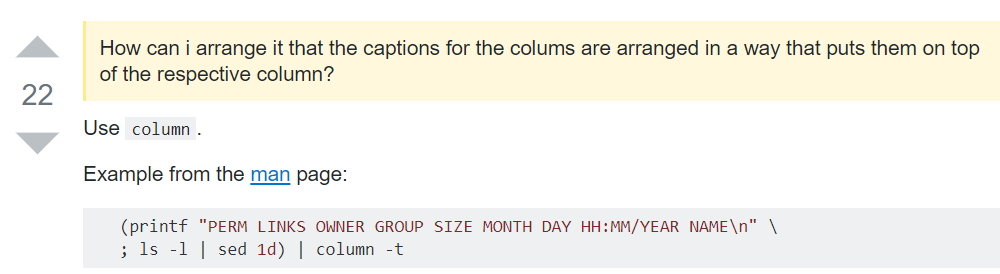

* 任务一最终结果

```shell
!cat cifar_train_resnet_11_18.log | head -n 200 | awk '
BEGIN 
{
    FS=" +|, |: ";OFS="\t";print "epoch\ttrain_acc\t\ttrain_loss\t\tval_acc\t\n"
}
/^\[+/
{
    print $2, $5, $8, $(NF-2)
}
'| column -t
```

In [239]:
!cat cifar_train_resnet_11_18.log | head -n 200 | awk 'BEGIN {FS=" +|, |: ";OFS="\t";print "epoch\ttrain_acc\t\ttrain_loss\t\tval_acc\t\n"} /^\[+/{print $2, $5, $8, $(NF-2)}'| column -t

cat: write error: Broken pipe
epoch  train_acc            train_loss          val_acc
1      0.3628222222222222   4.639335632324219   0.3936
2      0.46595555555555557  1.3284592628479004  0.5162
3      0.5665333333333333   2.6452484130859375  0.4996
4      0.6080888888888889   1.0159202814102173  0.5748
5      0.6294888888888889   1.284842610359192   0.601
6      0.6466888888888889   1.352370023727417   0.6408
7      0.6569555555555555   1.2865233421325684  0.6226
8      0.6634666666666666   2.391160488128662   0.662
9      0.6729333333333334   0.5892316699028015  0.6728
10     0.6738444444444445   0.7795113921165466  0.6526
11     0.7069555555555556   2.228287696838379   0.6648
12     0.7174444444444444   1.1964997053146362  0.667
13     0.717                0.9960783123970032  0.6844
14     0.7208444444444444   1.2373504638671875  0.7046
15     0.7255333333333334   1.0979046821594238  0.6758
16     0.7289333333333333   0.545863926410675   0.7172
17     0.7274444444444444   0.1524706

#### 任务二：计算上表中后三列的平均值，并记录在表格下方  
* 参考：https://stackoverflow.com/questions/19149731/use-awk-to-find-average-of-a-column

```shell
!cat cifar_train_resnet_11_18.log | head -n 200 | awk '
BEGIN 
{
    count=0;train_acc=0;val_acc=0;train_loss=0;
    FS=" +|, |: ";OFS="\t";
    print "epoch\ttrain_acc\t\ttrain_loss\t\tval_acc\t\n"
}
/^\[+/
{
    ++count;train_acc+=$5;train_loss+=$8;val_acc+=$(NF-2);
    print $2, $5, $8, $(NF-2)
} 
END 
{ 
    print "Average", train_acc/count,train_loss/count,val_acc/count
}
' | column -t
```

In [248]:
!cat cifar_train_resnet_11_18.log | head -n 200 | awk 'BEGIN {count=0;train_acc=0;val_acc=0;train_loss=0;FS=" +|, |: ";OFS="\t";print "epoch\ttrain_acc\t\ttrain_loss\t\tval_acc\t\n"} /^\[+/{++count;train_acc+=$5;train_loss+=$8;val_acc+=$(NF-2);print $2, $5, $8, $(NF-2)} END {print "Average", train_acc/count,train_loss/count,val_acc/count}' | column -t

cat: write error: Broken pipe
epoch    train_acc            train_loss          val_acc
1        0.3628222222222222   4.639335632324219   0.3936
2        0.46595555555555557  1.3284592628479004  0.5162
3        0.5665333333333333   2.6452484130859375  0.4996
4        0.6080888888888889   1.0159202814102173  0.5748
5        0.6294888888888889   1.284842610359192   0.601
6        0.6466888888888889   1.352370023727417   0.6408
7        0.6569555555555555   1.2865233421325684  0.6226
8        0.6634666666666666   2.391160488128662   0.662
9        0.6729333333333334   0.5892316699028015  0.6728
10       0.6738444444444445   0.7795113921165466  0.6526
11       0.7069555555555556   2.228287696838379   0.6648
12       0.7174444444444444   1.1964997053146362  0.667
13       0.717                0.9960783123970032  0.6844
14       0.7208444444444444   1.2373504638671875  0.7046
15       0.7255333333333334   1.0979046821594238  0.6758
16       0.7289333333333333   0.545863926410675   0.7172
17 

#### 其他

* awk行之间的格式输出：参考  
https://stackoverflow.com/questions/977408/how-do-i-insert-a-blank-line-every-n-lines-using-awk